In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  5<sup>th</sup> December, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [3]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=6, zmin=-3))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

**HIGHLIGHTS**:

- **Wall Street** closed mixed on Wednesday with the S&P eking out a fresh high, as traders shook off a disappointing employment report. In November, the US economy added only 245 thousand jobs, well below consensus of 440 thousand and October’s gain of 638 thousand. Still, the unemployment rate fell to 6.7% from 6.9% and matched consensus. On the pandemic side, the US reported record numbers on Thursday of new cases, single-day deaths and hospitalizations. The Dow Jones added 0.8% to 20,218. The S&P 500 climbed 0.9% to 3699. The Nasdaq jumped 0.7% to 12,464. During the week, the Dow Jones gained 1.0% , the S&P 500 1.6% and the Nasdaq 2.1%.


- Equities in **Europe** closed mostly in the green on Friday with Frankfurt's DAX 30 adding 0.2% to 13,283, helped by better-than-expected German factory orders data and news about Poland showing willingness to find a solution that would allow an agreement to be reached on the EU's €1.8 trillion stimulus package. The announcement came after top EU Commission officials said there would be some form of cooperation between the 25 other countries if Poland and Hungary maintained their veto to the EU budget and recovery fund. The deadline for the European Parliament and member states to reach an agreement on the annual budget is December 7th. Elsewhere, prospects of a bigger US stimulus package boosted sentiment, while uncertainty surrounding a post-Brexit trade deal continued. For the week, the DAX 30 lost 0.4%.


- The CAC 40 (**France**) added 35 points, or 0.6% to 5,6010 on Friday, after falling 0.2% in the previous session as investors continue to follow any developments on the EU budget, US stimulus package, coronavirus vaccine, and Brexit negotiations. On the data front, Markit PMI figures showed the construction sector in France remained in contraction in November. The CAC 40 edged up 0.2% in the first week of December, extending a 2% gain in the prior week. The FTSE 100 (**UK**) climbed 0.9% to close at 6,550 on Friday, its highest level since March 5th. Uncertainty surrounding a post-Brexit trade deal persisted, with an EU official saying an agreement was closer than ever but a UK government source warning chances for a breakthrough in the next few days were receding. For the week, the FTSE 100 gained 2.9%.


- The FTSE MIB (**Italy**) climbed 171 points, or 0.8% to 22,179 on Friday, following a 0.2% gain in the previous session, after recent Markit PMI data signaled a noticeably slower reduction in Italian construction activity and that constructors remained confident of higher output in 12 months. Traders continue to follow coronavirus vaccine developments and Brexit talks while prospects of a bigger US stimulus package helped sentiment. Meantime, figures from ISTAT showed retail sales climbed for a third month in October. For the week, the FTSE MIB lost 0.8%, following a 3% rally in the previous week.


- The IBEX 35 (**Spain**) rose 1.5% to close at 8,323 on Friday, its highest level since March 6th, amid continued optimism over COVID-19 vaccines and prospects of a bigger US stimulus package. On the domestic front, Spain’s lower house of parliament approved on Thursday the minority government’s 2021 budget bill on its first reading, bringing the coronavirus-battered country closer to having a new full-year spending plan for the first time since 2016. On the corporate front, Repsol was the top performer supported by a rally in oil prices after major oil producers agreed to ease deep output cuts from January less than initially proposed. The IBEX 35 advanced 1.6% in the first week of December, extending a 2.7% gain in the prior week.


- The Shanghai Composite (**China**) gained 0.07% on Friday, trading near 34-month highs while gaining 0.8% for the week. Investors remained cautious as the US department of defence designated another four Chinese companies as owned or controlled by the country’s military, taking the total number of such blacklisted firms to 35. A recent executive order by President Donald Trump will prevent US investors from buying securities of these companies starting late next year. In a rare public warning, the US’s director of national intelligence, John Ratcliffe, said overnight that China posed the greatest threat to America. The U.S. won’t “make any immediate moves” to remove China phase 1 tariffs, Biden told the New York Times. Biden also signaled an urgency to work with Europe to present a united front against China’s ascendancy in the global economy.


- China’s economic offensive against Australia is partly designed to warn countries against vocally opposing Beijing’s interests. Tensions escalated further after a Chinese Foreign Ministry official tweeted a fake photo of an Australian soldier holding a knife to the throat of an Afghan child. The U.S. restricted travel visas for members of the Chinese Communist Party. A senior U.S. official accused China of violating United Nations sanctions against North Korea. China’s official manufacturing purchasing managers’ index rose to 52.1 in November from 51.4 the previous month. That was the highest since September 2017. The data underlines China’s status as the only major economy to see a sustained rebound from the pandemic.


- The KOSPI (**South Korea**) gained 1.31% on Friday, extending gains for the fifth consecutive session to fresh record high valuations while closing 3.67% higher for the week. Meantime, the Korea Disease Control and Prevention Agency reported 629 more COVID-19 cases, the most in nearly nine months despite tightened antivirus measures as Prime Minister Chung Sye-kyun said the government will monitor the current pace until the weekend before deciding on additional measures on Sunday. In local data, South Korea's current account surplus widened to USD 11.66 billion in October of from USD 7.83 billion in the same month of the previous year, posting a three-year high as exports rose 8%, while imports added 1%. South Korea’s exports rose in November supported by demand for tech devices and gains in key markets. Overseas shipments rose 4% from a year earlier.



- The S&P/ASX 200 (**Australia**) Index was on form again last week and continued its winning streak. The benchmark index rose 0.5% higher to finish at 6,634. Data out earlier showed the AUD 2 trillion (USD 1.5 trillion) economy expanded by a bigger than expected 3.3% in the September quarter, following a 7% contraction in June, as the country largely got COVID-19 under control. Top lender Commonwealth Bank reported a 12% jump in spending on cards for the week-ending Nov. 23 from last year while ANZ saw a 28% surge. On Tuesday, the bank left its cash rate at a record low 0.1% and maintained its AUD 100 billion quantitative easing programme. Analytics software firm Nuix soared by as much as 70% above its IPO price on Friday as the company made a strong debut on the ASX. Sandfire shares was the best performer on the ASX 200 last week with a 28.6% gain. Investors were buying the copper producer’s shares after the release of its strategy update. Gains were boosted by Iron Ore miners such as BHP, Rio Tinto and Fortescue, all rising 10-15% this week.

**EMERGING MARKETS**

- **MEXICO’s IPC** lost 0.8% on Friday to retreat modestly a high since the last week of February, as profit taking outweighed the announcement of 250 thousand doses of the Pfizer vaccine for December and the second round of private-public infrastructure projects worth 1% of GDP. On the domestic side, the [consumer confidence index](https://www.thestar.com.my/news/world/2020/12/05/consumer-confidence-in-mexico-backslides-in-november) stood at 36.7 in November, one point lower than in October and 6.7 points lower than the same month of 2019, according to Inegi's seasonally adjusted figures. On Thursday, [S&P improved its GDP forecasts for the Mexican economy](https://www.reuters.com/article/us-mexico-s-p/sp-confirms-mexico-credit-rating-keeps-negative-outlook-idUSKBN28E011?il=0), now expecting a 3.9% expansion in 2021. During the week, the IPC jumped 3%. Mexico's auto exports rose 4.7% from a year earlier to 287,703 units in November 2020, the highest level since June 2019, following an 8.2% increase in the previous month. 


- **BRAZIL**’s Brazil’s Ibovespa closed deeply in the green and continued and booked a fresh high since 21 February 2020. On the domestic front, there are increasing fears about Brazil's public finances, despite President Jair Bolsonaro saying this week his government would not “perpetuate” emergency benefits granted to low-paid and informal workers during the pandemic. During the week, the Ibovespa jumped 3%. Overseas funds bought about 33.3 billion reais (USD 6.5 billion) of Brazilian stocks in November, the most since at least 2008. Sao Paulo reimposed tougher social distancing restrictions amid a jump in coronavirus cases. A battle for the presidency of both houses of Brazil’s congress is heating up with an upcoming top court ruling on whether the incumbents can run for re-election next year.


- The **SOUTH AFRICA** FTSE/JSE All Share Index extended gains for the fourth consecutive session on Friday, its strongest level since April 23rd 2019. For the week, the index rose 2.8%, extending a 2.1% gain in the prior week. Locally, concerns persist over a resurgence of coronavirus cases in some parts of the country and the impact of localized lockdowns on South Africa's fragile economic recovery. President Ramaphosa announced on Thursday new restrictions in the south of the country, with Nelson Mandela Bay becoming the first area in South Africa to be declared a coronavirus hotspot. Ramaphosa also announced that the national state of disaster has been extended to January 15. An index measuring South African manufacturing sentiment fell to a four-month low, signaling a recovery in the sector is losing momentum as conditions normalize after the easing of coronavirus restrictions South Africa recorded its sixth monthly trade surplus in October. The trade balance increased to 36.1 billion rand (USD 2.4 billion) last month from a revised 33.4 billion rand in September.


In other EM developments,


- Turkish inflation climbed more than expected in November as the lira’s depreciation filtered through to prices, raising pressure on central bank Governor Naci Agbal to keep monetary policy tight. **Turkey**’s sovereign wealth fund will retry a Eurobond issuance next year after its debut was shelved two months ago due to weak investor demand. Turkey announced tighter restrictions on the movement of citizens and commercial activity, as new coronavirus case counts hover at about 30,000. Meanwhile, **Iran**’s top political chamber gave final approval to a bill forcing President Hassan Rouhani to end international nuclear inspections unless the U.S. lifts key sanctions by February.


- **Philippine** President Rodrigo Duterte extended the existing movement restrictions in the capital region through year-end, while keeping most of the country under the most lenient status. The Philippines’ unemployment rate eased to 8.7% in October from 10% in July as more businesses reopened. A **Thai** court dismissed a petition seeking to disqualify Prime Minister Prayuth Chan-Ocha for allegedly breaking ethical rules, allowing him to stay in power as pro-democracy protesters campaign for his resignation.


- **Peru**’s interim president, Francisco Sagasti, won an inaugural vote of confidence for his two-week-old cabinet after urging lawmakers to support his “precarious” government to bring stability ahead of a general election in April. **Chile**’s economic activity unexpectedly contracted in October as service-sector weakness offset retail sales that were boosted by early pension withdrawals. Meanwhile, **Colombia** drew down USD 5.4 billion from its flexible credit line with the International Monetary Fund to help fund its response to the coronavirus crisis. Moody’s Investors Service lowered Colombia’s credit outlook to negative.


**ECONOMIC DATA WATCH**


- A series of PMI data painted a mixed picture of the global economy ; consistent with recent indicators, the US and China continued to witness rather solid economic recovery ; UK PMIs were mixed with manufacturing sector improving and services sector taking a new hit from the recent lockdown. Eurozone PMIs were both weakened by new lockdowns and restrictions while Japan saw no improvement in its PMI data. Other highlights include falling initial jobless claims to 712k last week in the US, after the ADP private pay rolls disappointed with a mere 307k gains. US housing data were mixed – private residential construction spending continued to rise, same goes to mortgage applications to buy houses but pending home sales fell for the second month. The Fed’s latest Beige Book also reported modest growth nationwide.



- Elsewhere, Eurozone retail sales turned out stronger than expected, thanks to a broad-based growth and in particular a rebound in online sales; however inflation remained negative for the fourth consecutive month. Unemployment rate went down to 8.4%. Japan jobless rate rose to highest since May 2017. Australia recorded upbeat data with GDP growth coming in at 3.3% QoQ, trade data, retail sales and home loan numbers were all very positive. Other than that, Hong Kong retail sales recorded its first single-digit decline since June last year, after months of double-digit falls.


**DATA RELEASES NEXT WEEK**


- The week kicks of with China’s trade data which is expected to offer more insights to the country’s international trade sector as well as global demand for Chinese goods. Australia services PMI, Japan leading index, Eurozone Sentix Confidence Index and Malaysia foreign reserves are also on the deck.


- On Tuesday, the final reading for Japan 3Q GDP growth alongside household spending and wage data are scheduled for morning releases, followed by Australia Business Confidence. Eurozone final GDP report and ZEW Investor Expectation Index and US Small Business Optimism Index are released in the evening.


- Wednesday data are limited to China CPI and PPI inflation, Australia Consumer Confidence Index, Japan core machine orders and US mortgages applications. 


- On Thursday, the ECB meeting and Christine Lagarde’s press conference are set to take much of the attention. New Zealand retail card spending and Japan BSI Large Manufacturing Index are scheduled for morning releases. UK GDP growth and its key indicators are also in the pipeline, followed by US CPI and initial jobless claims. Last but not least, the week wraps up with New Zealand manufacturing PMI, Malaysia industrial production as well as US PPI and University of Michigan Consumer Sentiment Index.

**STOCKS THAT DEFINED THE WEEK**


**KOHL'S CORP (KSS)**

-  A new face-off is unfolding in the world of beauty. Sephora plans to install 850 shops inside Kohl’s Corp. stores by 2023, upending the beauty retailer’s longstanding partnership with J.C. Penney Co. That follows Ulta Beauty Inc.’s deal announced in November to open more than 100 shops inside Target Corp. stores by next year. Beauty has been one of retail’s brighter spots during the pandemic. Department stores are struggling to find new revenue sources as shoppers turn to fast-fashion chains, discount retailers and e-commerce players. Shares of Kohl’s rose 13% Tuesday.

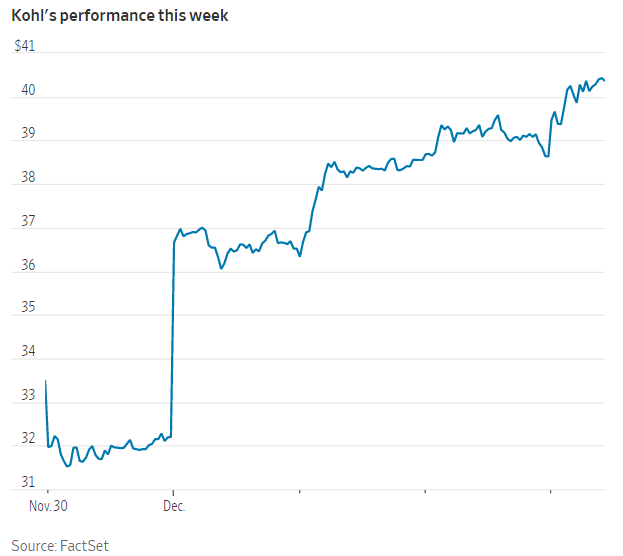

**ZOOM VIDEO COMMUNICATIONS (ZM)**

- Investors may have Zoom fatigue. Despite posting another quarter of record sales and lifting its outlook due to the proliferation of remote working and distance schooling, Zoom Video Communications Inc. reported higher costs that disappointed holders of the company’s stock. Zoom has been providing some of its services free to users, and that is weighing on its profitability, Zoom said Monday. Gross margin for the quarter fell to 67%, down from 71% in the prior three-month period, as the company spent heavily on its cloud-computing needs. Shares dropped 15% on Tuesday.


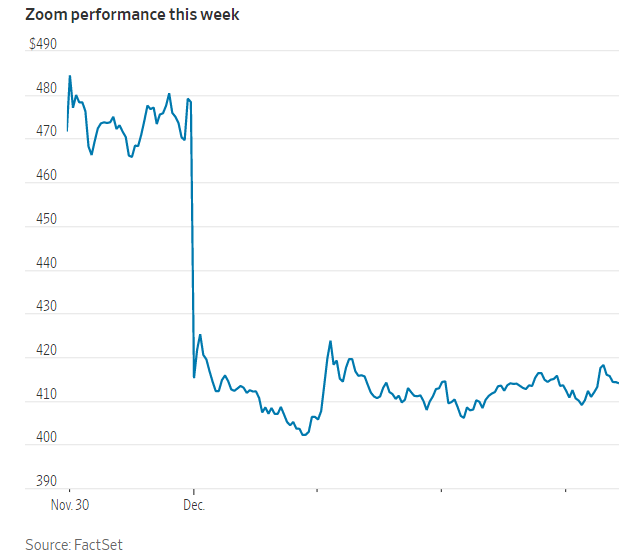

**HEWLETT PACKARD ENTERPRISE (HP)**

- So long, Silicon Valley. Hewlett Packard Enterprise Co.—a descendant of the firm that Bill Hewlett and Dave Packard famously started in their Palo Alto, Calif., garage—is moving its headquarters to the Houston area, the latest sign that Silicon Valley is losing some of its gravitational pull. HPE said the cheaper real estate in Texas would help it save money, and hiring is also generally cheaper and less competitive in that state than in California. The company is currently based in San Jose. That city’s mayor, Democrat Sam Liccardo, said HPE’s decision was “a wake-up call.” HPE shares rose 2.9% Wednesday.

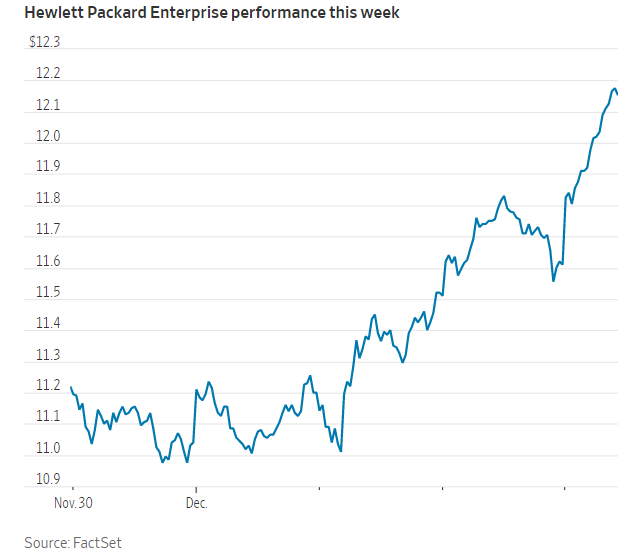

**AT&T (T)**

- A Hollywood giant is blurring the traditional boundaries between your TV screen and the neighborhood movie theater. AT&T Inc.’s Warner Bros. said it will release its entire 2021 slate of theatrical films simultaneously in theaters and on its HBO Max streaming service, taking the most drastic step yet in eliminating the exclusivity theater chains have enjoyed for decades. Warner Bros. movies will play on HBO Max during their first month of theatrical release before leaving the service while staying in theaters. The hybrid model will apply to all of Warner Bros. films next year, from smaller-scale releases to big-budget movies that traditionally require gargantuan box-office sales to turn a profit. The head of AMC Entertainment Holdings Inc., the world’s largest movie theater chain, said WarnerMedia must be willing to give up “a considerable portion of the profitability” of its studio division to “subsidize” HBO Max, adding “we will do all in our power to ensure that Warner does not do so at our expense.” AT&T shares rose 0.5% Thursday.


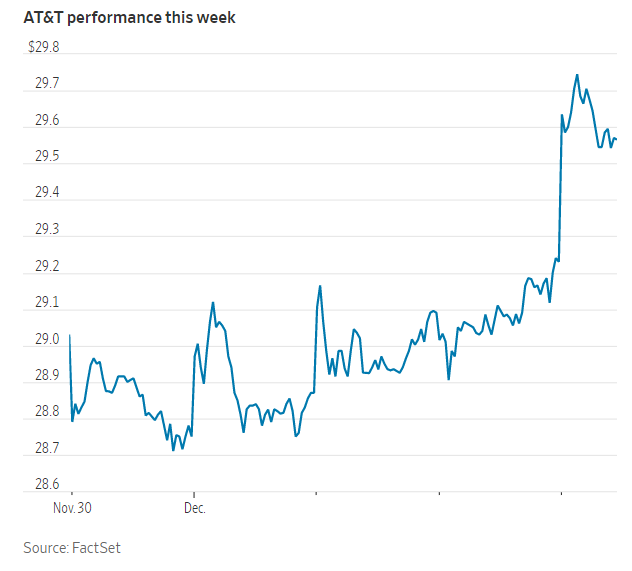

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

**HIGHLIGHTS**


- The week under review saw US Treasuries close slightly weaker save for the short-end on signs that Congress will reach a consensus on the much-talked about pandemic relief stimulus following President-elect Biden’s endorsement. UST yields shot higher and the yield curve steepened on Friday after a disappointing [November employment report](https://www.washingtonpost.com/business/2020/12/04/november-2020-jobs-report-unemployment/) added to pressure for Washington to pass a new round of stimulus to help the coronavirus-battered economy. The selloff in Treasuries, which lost some steam later in the session, lifted yields particularly on the longer end of the curve. The benchmark 10Y yield  climbed to its highest level since March at 0.986%. Meanwhile, the current lack of clues on policy changes by the Fed from the minutes of its 4th - 5th November FOMC meeting may cause some investors to believe that adjustments to the Fed’s bond-buying program will be announced eventually.


- After liquidating 65% of long Treasury bets since August, systematic players known as Commodity Trading Advisors [will dump bullish exposures “en masse”](https://www.bloomberg.com/news/articles/2020-12-03/nomura-quant-warns-trend-followers-may-ditch-all-treasury-longs?utm_medium=email&utm_source=newsletter&utm_term=201204&utm_campaign=fixedincome) if the 10-year yield climbs above 1.02%, according to Nomura Holdings. “CTAs are looking increasingly likely to have to exit the entirety of their aggregate net long,” Masanari Takada, a quantitative strategist at the bank wrote in a note Thursday. “The 10yr UST yield could jump up to around 1.20% if CTAs were to sell their way down to a flat position.”


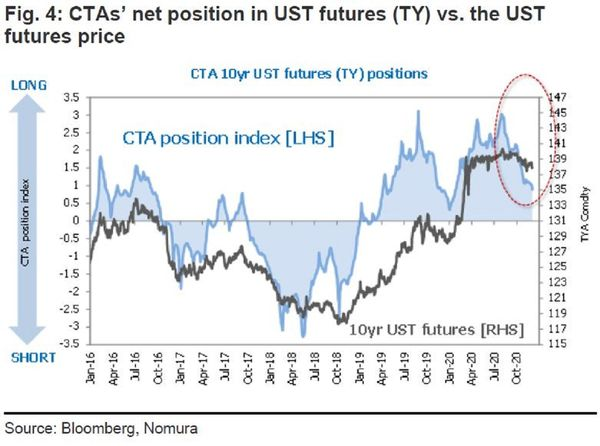

- Risk markets, including EM debt, posted very strong returns in November, propelled by the month’s momentous fundamental developments: positive vaccine news and the removal of US election tail risk. EM hard currency sovereigns returned 3.9% for the month, while the local currency sovereign market was up 5.5%. Even more noteworthy was the performance of high yield-rated hard currency sovereign debt, which posted its fourth-highest monthly return on record, at 6.1%, trailing only May of this year and two months in the wake of the global financial crisis. While these are impressive gains, spreads could still tighten further, especially with a cross-market view, as high yield-rated hard currency sovereign debt trades wide to US high yield.





**High yield-rated EM sovereign debt trades wide to US high yield**

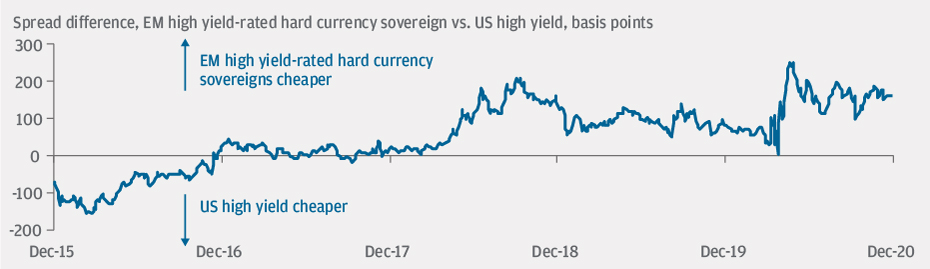
*Source: J.P. Morgan Asset Management, J.P. Morgan, Bloomberg, Bank of America Merrill Lynch; data as of 30 November 2020.

**CENTRAL BANKS AND RATES ACTION**



- **India**’s central bank left interest rates unchanged for a third meeting, amid stubbornly high inflation and signs of an economic revival. **Hong Kong** said it is discussing plans with the Chinese central bank to allow mainland investors to trade bonds in the city via an existing link. Foreign investors’ holdings of Chinese domestic corporate bonds rebounded in November as they sought bargains during a credit selloff fueled by some state-linked firms defaulting. Meanwhile, bonds from **South Korean** issuers are benefiting from their safe haven status as some investors turn away from Chinese debt after a spate of defaults. Inflation accelerated in South Korea after the end of government discounts on mobilephone fees, but recent gains in the won and a resurgence of the coronavirus cloud the outlook for prices.


- **Indonesia**’s central bank pledged to keep an accommodative stance and use all its policy instruments to spur a recovery. Indonesia cut short its year-end holiday in a bid to curb the spread of coronavirus infections, after a long weekend in October led to a spike in confirmed cases. Recent measures from the **Bank of Thailand that aim to restrain the surging baht** will likely be followed by **“further strict”** steps, but policy makers are unlikely to impose outright capital controls, Thai Finance Minister said. Thailand will spend an additional USD 1.4 billion in the first quarter to expand the scope of a co-payment program and increase cash handouts to aid a economic recovery. Bank of Thailand deemed it appropriate to consider implementing additional appropriate measures to counter the baht rally.


- **Taiwan**’s central bank will provide more information about its efforts to **control the currency’s rapid rise**, responding to calls for more transparency over its actions. **Poland** kept borrowing costs unchanged as quantitative easing, rather than negative interest rates, remains the preferred tool to buoy the economy. **Brazil**’s central bank increased the size of a daily currency swaps rollover auction, signaling it will support the real through year-end.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [5]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [6]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [7]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [8]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**



- **USD:** The dollar (-1.4%) continued to weaken for the week, hitting a YTD low of 90.511 on 3rd December. The dollar continues to broadly decline, recently dropping through major support levels against both European and Asian currencies. This pro-growth dollar decline needs to be fed by good news on growth/vaccines and a Federal Reserve still prepared to keep rates on the floor. On the former, markets will be watching out for progress on the USD 908 billion bi-partisan stimulus bill in the US Senate and also whether the FDA approves the Pfizer/BioNTech vaccine when it meets on Thursday. Progress on both of those is good for risk assets and bad for the dollar.


- The US data calendar will be light after the nonfarm payrolls release, though there will be focus on November’s small business optimism index (NFIB), November CPI and the December University of Michigan data including consumer sentiment and inflation expectations. Any pick up in 5-10 year inflation expectations (now 2.5%) suggests the Fed has been successful, real US rates are falling and the dollar bear trend should continue. 


- **EUR**: EUR/USD (+1.93%) touched a YTD high on 3rd December of 1.2175, after a bullish weekly trend. This was mostly from dollar weakness, as virus continued to wreak havoc in Europe. Retail sales surpassed expectations, although prices stayed muted. Thursday is shaping up to be a massive day for European event risk. The EU Leaders’ summit, beginning Thursday, should shed light on progress on both the EU Recovery Fund and Brexit. Credible threats to write Poland and Hungary out of the EU Recovery Fund, even if it means shifting to emergency budgets in January, should be enough to secure a compromise here. Let’s see what President Christine Lagarde has to say about the euro. The market won’t buy any description of EUR gains as ‘brutal’ – the trade weighted EUR is merely at the top of its four-month range owing to strong gains in Asian FX.



- **JPY**: JPY (+0.4%) underperformed for another week, although still strengthening against the dollar. However, the pair is closing on the lows seen on 6th of November, catching up on other G10 currencies by end-week. Japan’s retail sales and industrial production had improved in October compared to a month ago. 


- **AUD**:  AUD/USD (+1.1%) touched a YTD high on 3rd December of 0.745, undeterred by domestic risks. Australia-China trade tensions stay high. RBA kept policy rates unchanged as GDP, trade and retail sales data look positive. AUD/USD has continued to inch higher, largely on the back of USD weakness, but was outperformed by most of the G10 currencies in a week where investors largely rotated from conventional pro-cyclicals to the likes of EUR and CHF. Overall, expecting the risk environment to stay supportive and USD weak, should allow AUD/USD to test 0.75. Meanwhile, China allowed one coal cargo from Australia ashore this week: let’s see if this is followed by more baby steps towards a de-escalation of trade tensions, which would add fuel to another leg higher in the Aussie dollar.



- **NZD:** The Kiwi dollar (+0.99%) staged only a marginal gain this week following a very strong month of November. This is not surprising considering that the positive impact of the re-pricing of negative-rate expectations has ended and that further upside for front-end rates is now very limited. There are no data releases worth mentioning nor central bank events next week in New Zealand, so NZD should continue to move in line with risk appetite. Accordingly, we could still see NZD/USD edge higher in the coming days, but NZD momentum appears to be fading (some long-squeezing may also get in the way), so one can expect NZD to underperform its peers AUD and CAD next week.


- **CAD**: CAD (+1.21%) outperformed AUD, NZD. Another above-consensus employment report yesterday (+62k increase in hiring, unemployment rate dropping to 8.5% in November) offset the quite grim [September GDP figures](https://www.cbc.ca/news/business/canada-gdp-1.5823225) earlier in the week and fuelled hopes of a well-paced economic recovery in Canada. This contributed to the very good momentum in the Canadian dollar thanks to the general supportive risk sentiment and the positive oil reaction from OPEC+'s agreement on tapering cuts. USD/CAD has dropped below the 1.30 mark and the relatively solid fundamentals of the loonie, along with a continuation of the benign USD decline. This coming week, the Bank of Canada's rate decision will be in focus, but markets see very little room for surprise. The jump in employment in November is another factor which suggests the BoC does not need to expand its stimulus package (via rate cuts or more QE). At the same time, with lingering uncertainty about the timing for rolling out a vaccine, Governor Tiff Macklem is unlikely to sound too hawkish or upbeat on the recovery.


- **EMFX**: In EMFX, Colombian Peso (+4.3%), Brazilian Real(+3.6%) & Chilean Peso (+2.1%) were the top performers, while MXN (+0.65%) and ZAR (+0.27%) saw modest gains considering their recent outperformance in the EMFX space. Overall, in this more benign environment from EMFX in general, and a weaker USD, we should see greater scope for outperformance in Brazilian and Colombian assets. Mexican assets remain attractive, but the rally seen in recent months have brought local assets closer to fair value. In particular, the COP and the BRL stand out in the region as the currencies with the strongest potential for appreciation in 2021. Even though the potential for appreciation appears largest in the BRL, the COP may offer the best risk-reward proposition. The CLP was the best-performing currency YTD in LATAM and, if past correlations hold, the currency could strengthen further on the back of elevated copper prices in 2021.

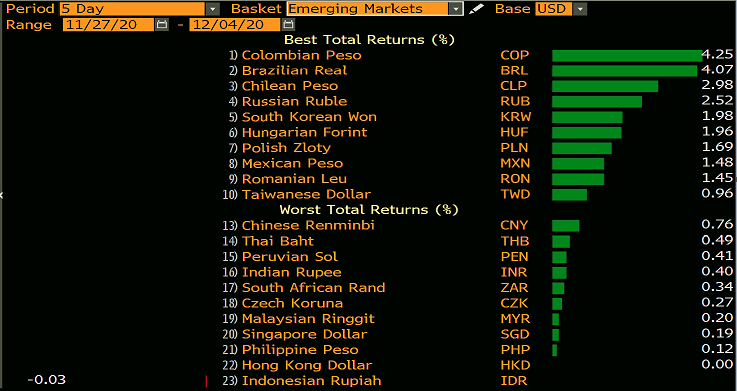

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [9]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [11]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [12]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [13]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [14]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [15]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> The post-November 9 surge in risk appetite on vaccine optimism extended into December with stock markets, led by Asia, continuing higher while the Bloomberg Dollar Index, which tracks the performance of ten leading global currencies versus the U.S. dollar, slumped to a 32-month low. These developments combined with additional stimulus being discussed in the U.S. and Europe and OPEC+ reaching a sensible compromise on post-pandemic production increases helped boost crude oil and metal prices, both industrial and precious.


> The agricultural sector paused following a 25% rally since June with cocoa, wheat and coffee the main losers. Scraping the bottom was once again natural gas which slumped by more than 10% with milder-than-normal U.S. winter weather raising doubts about demand at a time of robust production.


> Overall, these developments left the Bloomberg Commodity Index close to unchanged in a week that, following the monthly U.S. jobs report, normally signals the beginning of slowing trading activity ahead of the Christmas and New Year period. Still down on the year following the Q1 lockdown-led collapse, the index has made a strong recovery since then.



- **WTI crude** reached a 9-month high after the OPEC+ group of producers, following another nail-biting week of discussions, agreed on a [compromise deal that will see production rise in stages over the coming months, starting with 500,000 barrels/day](https://edition.cnn.com/videos/business/2020/12/04/opec-russia-oil-production.cnnbusiness) in January. With the expected vaccine-driven recovery in global fuel demand this deal will go a long way to ensure the price of oil remains supported until it can stand on its own feet.


- The fact that the market rallied despite having priced in a postponement of the previously agreed 1.9 million barrels/day production increase was due to the [flexibility of the deal](https://www.spglobal.com/platts/en/market-insights/latest-news/oil/120320-opec-to-ease-quotas-by-500000-bd-in-jan-meet-monthly-thereafter-sources). Meaning that production can be raised but also cut back should the recovery turn out to be slower than expected. Overall, analysts are now expecting that the road towards a balanced market has been shortened and on that basis expectations for higher crude oil and fuel prices into 2021 have been given a boost.


- Brent is likely to print USD 50/bbl sooner rather than later with already strong Asian demand eventually being joined by others once the Covid-19 cloud lifts. Just how much further it may rally in the short term depends on how Europe and especially the U.S. tackle the current and not-yet-under-control second wave of the Covid-19 outbreak.

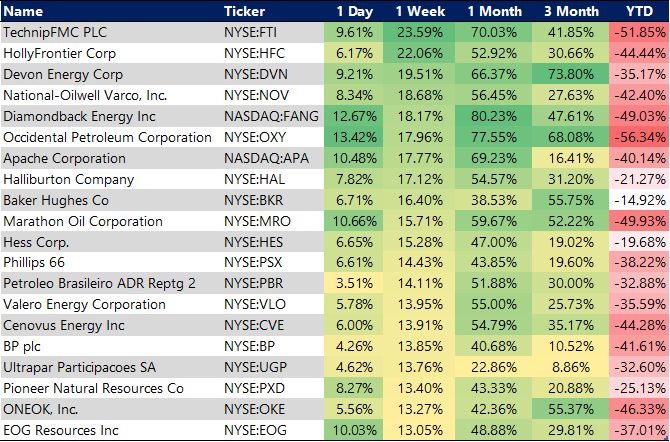

- **COPPER** prices hit the highest in more than seven years amid deepening concerns that miners will struggle to match demand from recovering economies besides the surge in demand already from China. Adding the this, the green transformation which will only continue to increase demand as the electrification wave gathers momentum.


- Led by copper, both **SILVER** and **PLATINUM** rallied strongly, thereby helping gold to find support before bouncing on its own merits. Silver had already seen a strong recovery relatively to gold back in August when the gold-silver ratio returned to its long-term average of around 70 ounces of silver to one ounce of gold. Platinum, meanwhile, needed the vaccine boost and a strong recovery in automobile demand in order to shine. Since these two powerful developments joined forces in early November, platinum has outperformed gold by 20% with the gold-platinum ratio going from 2.15 to the current 1.75.



- It is also worth taking a closer look at the copper (LME) – gold ratio and its relative close correlation with movements in U.S. bond yields. The chart below shows that the relationship between the two has broken down during the past month. Copper’s surge higher and fading interest for gold describes a world where growth is the main focus. Normally, such a development would lead to rising bond yields and the fact that it hasn’t makes one wonder whether this is a new normal or whether a realignment can occur. The most probable scenario seems to be that the latter will happen through a combination of higher gold prices driving the ratio lower and a small uptick in bond yields.

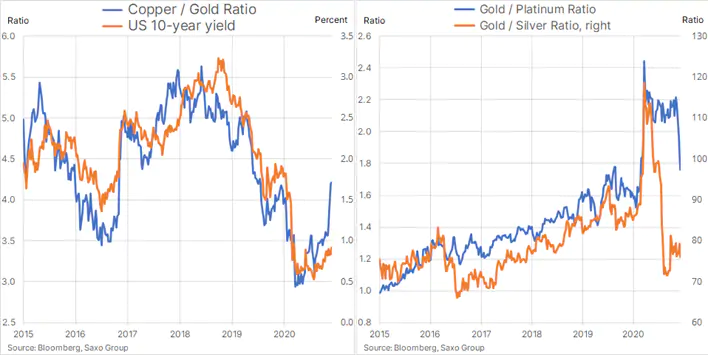




- Meanwhile, Coal prices rose towards USD 75 per tonne in December, a level not seen since January amid expectations of higher restocking levels and a boost in seasonal demand. Also, China placed an unofficial ban on imports of coal from Australia in October but there are reports that a cargo of 135,000 tons of thermal coal will be allowed to be shipped into the country. At the same time, stringent inspections on Chinese mines and tightening imports fuelled supply concerns, supporting bullish sentiment in the last quarter of 2020.

- **URANIUM** prices consolidated around USD 30 per pound, below a four-year high of USD 34 per pound hit in May as short-term supply concerns eased after Cameco and Kazatomprom, producers of more than half of the global supply, resumed the production after mine shutdowns earlier this year. These two largest miners began cutting production in 2018 to lift the prices, leading to a supply deficit. The unexpected suspension of operations in March and April added to supply shortage as long-term demand is set to increase as the construction of 55 new reactors is underway.


**GLOBAL X URANIUM ETF (URA) SURGES 7% ON FRIDAY & JUMPS 12% IN A WEEK** 

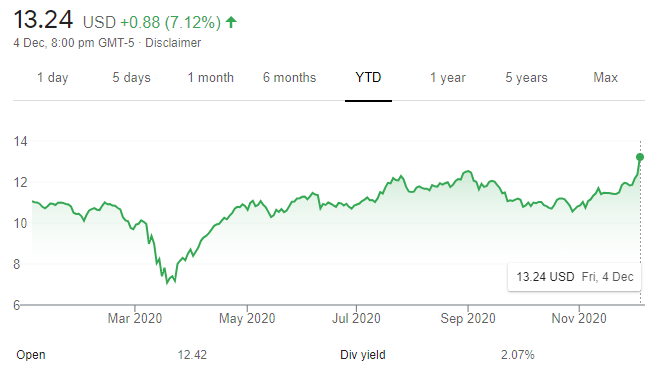

- In Softs, Raw sugar futures started December around the 14.50 cents/lb level, slightly below a nine-month high of 14.66 cents/lb hit in November. The market awaits developments from India’s export policy for the current season with the lack of any export subsidies so far keeping much of the country’s surplus out of the international market. At the same time, elevated production from heavyweight Brazil is due to put some downward pressure on prices.



- US Cocoa futures slipped to USD 2,870 per tonne on Friday and are set for a 5.4% fall in the first week of December, the first weekly drop since the week ended October 26th as investors unwound long positions after November's rally. In November, the cocoa market rallied more than 30% as traders rushed to buy beans to avoid higher costs from Ivorian and Ghanaian producers.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

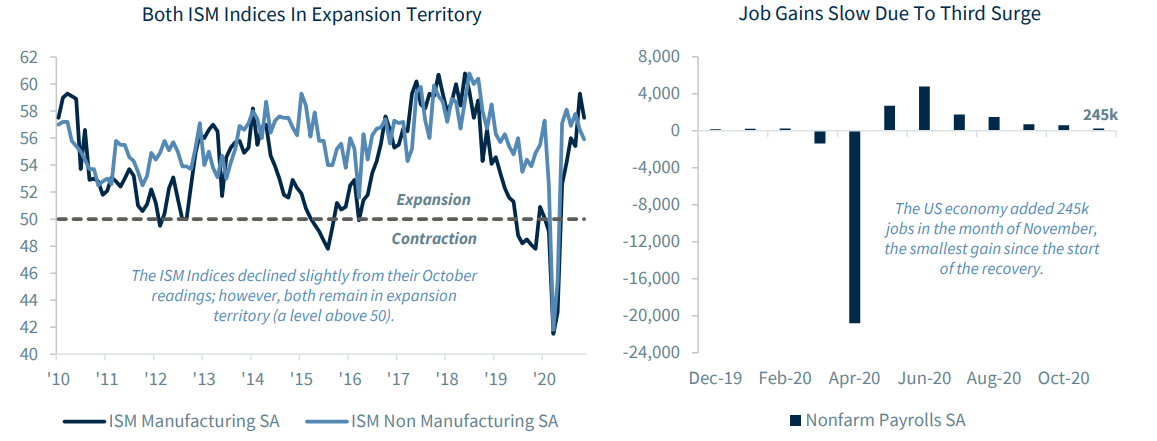

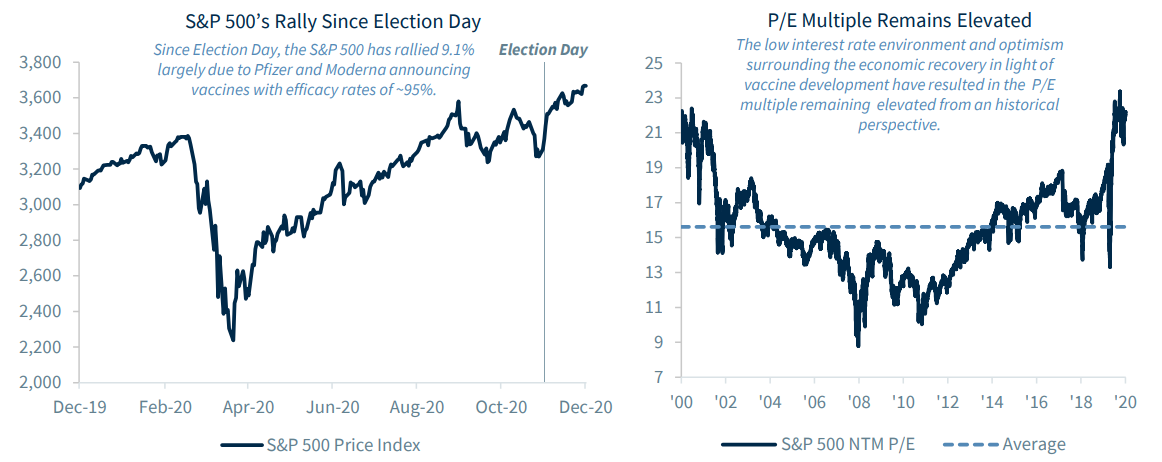

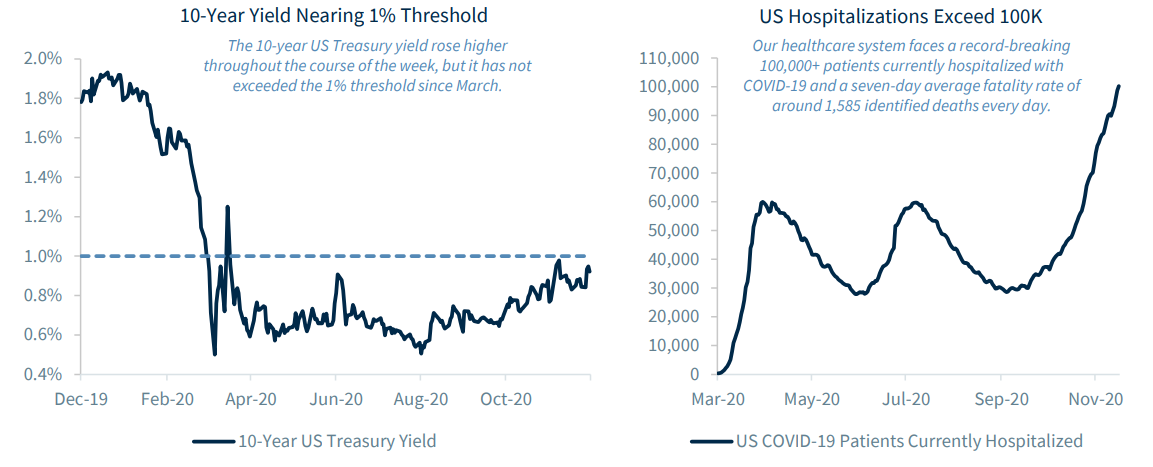

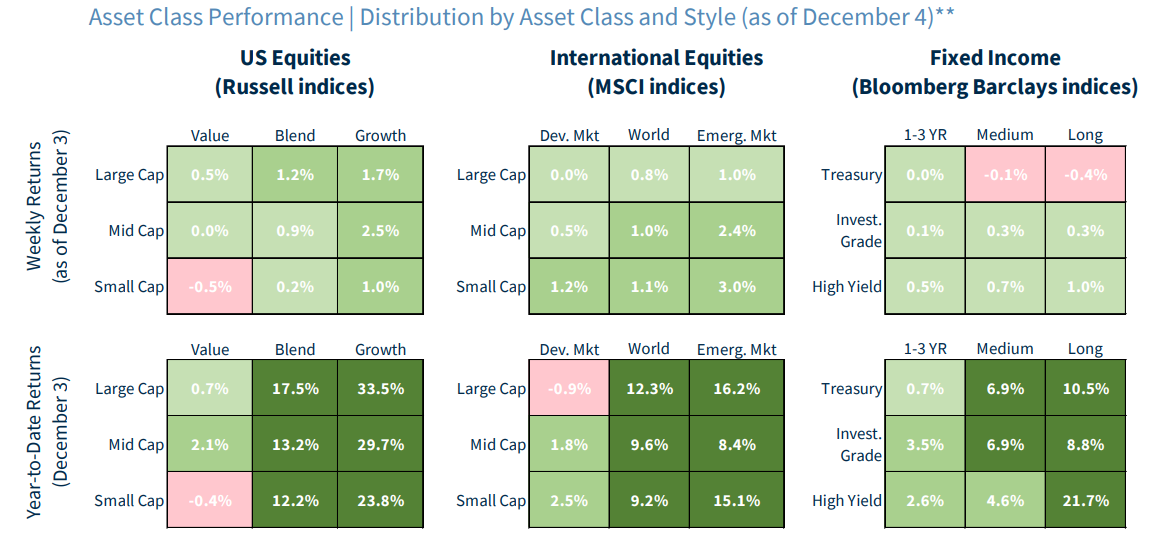

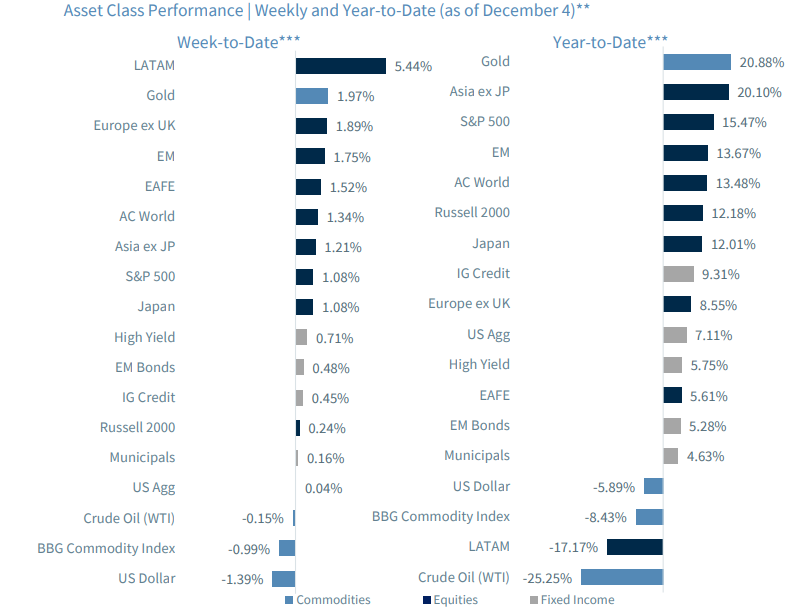

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [16]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)